In [155]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

## Spark K-means

throughput = lastReceivedBatch_records/ (lastReceivedBatch_processingEndTime-lastReceivedBatch_processingStartTime) <br>
Parameters: Streaming window: 60 seconds, Number of cluster centroids, Number  of data points <br>

In [156]:
directory = '/home/georgeha/repos/midas_exps/streaming/k-means/2_run'
lastReceivedBatch_processingEndTime_dir = '/app-20170629170818-0000.driver.PythonSparkStreamingKafkaKMeans.StreamingMetrics.streaming.lastReceivedBatch_processingEndTime.csv'
lastReceivedBatch_processingStartTime_dir = '/app-20170629170818-0000.driver.PythonSparkStreamingKafkaKMeans.StreamingMetrics.streaming.lastReceivedBatch_processingStartTime.csv'
lastReceivedBatch_records_dir = '/app-20170629170818-0000.driver.PythonSparkStreamingKafkaKMeans.StreamingMetrics.streaming.lastReceivedBatch_records.csv'

lastReceivedBatch_processingEndTime  = pd.read_csv(directory + lastReceivedBatch_processingEndTime_dir ,skipinitialspace=True)
lastReceivedBatch_processingStartTime = pd.read_csv(directory + lastReceivedBatch_processingStartTime_dir,skipinitialspace=True)
lastReceivedBatch_records = pd.read_csv(directory + lastReceivedBatch_records_dir,skipinitialspace=True)

In [157]:
throughput = 1000*lastReceivedBatch_records/(lastReceivedBatch_processingEndTime-lastReceivedBatch_processingStartTime)
throughput = throughput['value']
throughput = throughput.tolist()
for i in xrange(len(throughput)):
    if throughput[i]<0:
        throughput[i]=0
# start_time1498774108 



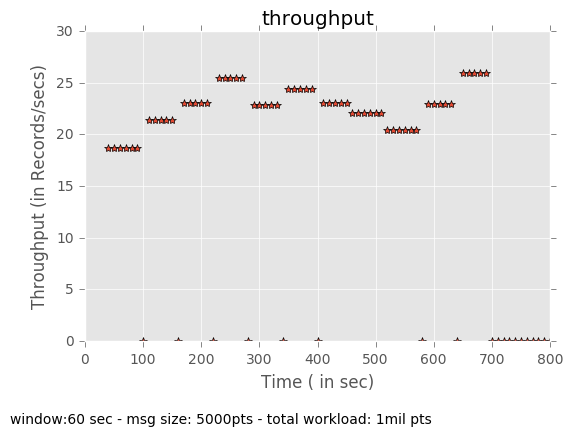

In [158]:
x_values = lastReceivedBatch_records
x_values = x_values['t']
x_values = x_values.tolist()
shift_time = 1498774148

for i in xrange(len(x_values)):
    x_values[i] = x_values[i] - 1498774108

#plt.xticks()
plt.xlim(0,800)
plt.plot(x_values,throughput,'*')
plt.ylabel('Throughput (in Records/secs)')
plt.xlabel('Time ( in sec)')
#plt.title('window:60 sec - msg size: 5000pts - total workload: 1mil pts')
plt.title("throughput")
plt.figtext(0,-0.08,'window:60 sec - msg size: 5000pts - total workload: 1mil pts')

In [159]:
(lastReceivedBatch_processingEndTime-lastReceivedBatch_processingStartTime)['value']/1000

0               0.000
1               0.000
2               0.000
3               0.000
4               4.338
5               4.338
6               4.338
7               4.338
8               4.338
9               4.338
10    -1498774203.565
11              9.332
12              9.332
13              9.332
14              9.332
15              9.332
16    -1498774263.404
17              8.685
18              8.685
19              8.685
20              8.685
21              8.685
22    -1498774323.063
23              7.858
24              7.858
25              7.858
26              7.858
27              7.858
28    -1498774383.476
29              8.742
            ...      
81              0.900
82              0.895
83              0.895
84              0.895
85              0.895
86              0.895
87              0.895
88              0.910
89              0.910
90              0.910
91              0.910
92              0.910
93              0.910
94              0.874
95        

In [160]:
lastReceivedBatch_records['value'].tolist()

[0,
 0,
 0,
 0,
 81,
 81,
 81,
 81,
 81,
 81,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 94,
 94,
 94,
 94,
 94,
 94,
 106,
 106,
 106,
 106,
 106,
 106,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

### Latency

In [165]:
directory = '/home/georgeha/repos/midas_exps/streaming/latency/1_broker/1_broker_killed_latency'
aname = '/kafka-latency.csv'
latency_saturated_data  = pd.read_csv(directory + aname ,skipinitialspace=True)
published_times = latency_saturated_data['Start_time']
latency_saturated_data = latency_saturated_data['Latency']
latency_saturated_data.head()

0   6.012
1   6.015
2   6.015
3   6.015
4   6.015
Name: Latency, dtype: float64

In [170]:
import time, dateutil
saturated_date_times = []
for cur_time in published_times:
    cur_time = cur_time.split('T')[1]
    cur_time = dateutil.parser.parse(cur_time)
    miliseconds = cur_time.microsecond/1000000.0
    saturated_date_times.append(time.mktime(cur_time.timetuple()) + miliseconds- 1498603485-167578- 2419200-86400)

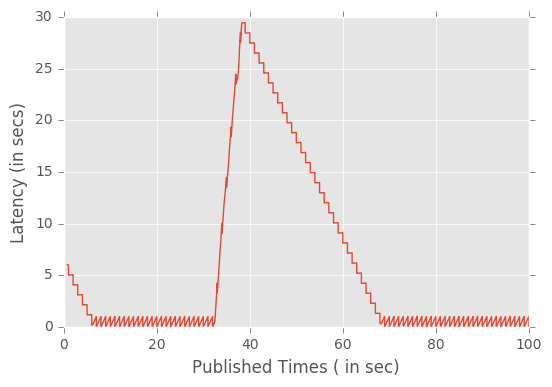

In [173]:
#x = np.linspace(0,adata.count(),adata.count())
plt.xlim(0,100)
#plt.xticks()
plt.plot(saturated_date_times,latency_saturated_data.tolist())
plt.ylabel('Latency (in secs)')
plt.xlabel('Published Times ( in sec)')

The spike appears 3663 Messages. Each message is : 58 mb which is 10.000 points <br>
Therefore, after 3663*30000 = 107GB
wrangler has 107GB free

The nose of the spike is at : 4396 messages, which is:  <br>
4396*30000 = 128GB 
and then the latency start decreasing

